# Bock ciphers

Data is encrypted in blocks of certain amount of bytes, for instance 16 bytes. In general a block cipher that encodes with size 16 calculates ciphertexts of size multiple 16.

<img src="img/block_cipher.png" style="width:1100px"/>

## Padding a message

Most of the times the lenght of the message is not a multiple of the block size so we need to "pad" the message to have the required length. A common padding function is [PKCS7](https://en.wikipedia.org/wiki/Padding_(cryptography)). Basically what PKCS7 does is appendinng a list of bytes with the same value corresponding to the number of bytes needed to complete the block.


We will use PKCS7 it in the next example:

In [1]:
from crypto import bytes_to_bin, bytes_to_hex

message = b"Cryptography is a complex subject after all..."
bin_repr = bytes_to_bin(message, pre="")
hex_repr = bytes_to_hex(message, pre="")

print(f"message:\n\t{message}")
print(f"(bin) \n\t{bin_repr}")
print(f"(hex) \n\t{hex_repr}")

message:
	b'Cryptography is a complex subject after all...'
(bin) 
	01000011011100100111100101110000011101000110111101100111011100100110000101110000011010000111100100100000011010010111001100100000011000010010000001100011011011110110110101110000011011000110010101111000001000000111001101110101011000100110101001100101011000110111010000100000011000010110011001110100011001010111001000100000011000010110110001101100001011100010111000101110
(hex) 
	43727970746f677261706879206973206120636f6d706c6578207375626a65637420616674657220616c6c2e2e2e


In [2]:
print(f"message is {len(message)} bytes or {len(bin_repr)} bits")

message is 46 bytes or 368 bits


In [3]:
def PKCS7(m: bytes, block_size_bytes = 16):
    n_bytes = block_size_bytes - len(m)%block_size_bytes
    pad = bytes([n_bytes for _ in range(n_bytes)])
    return m + pad
    
padded_message = PKCS7(message)
print(padded_message)

b'Cryptography is a complex subject after all...\x02\x02'


In [4]:
from cryptography.hazmat.primitives import padding

block_size_bits = 128

padder = padding.PKCS7(block_size_bits).padder()
padded_mesage = padder.update(message) + padder.finalize()

print(f"message:\n\t'{message}'")
print(f"\npadded_data: \n\t{padded_mesage}\n")

print(f"bytes per block: {int(block_size_bits/8)}")
print(f"bits per block: {block_size_bits}")
print(f"message length: {len(message)}")
print(f"padded_message lenght: {len(padded_mesage)}")

message:
	'b'Cryptography is a complex subject after all...''

padded_data: 
	b'Cryptography is a complex subject after all...\x02\x02'

bytes per block: 16
bits per block: 128
message length: 46
padded_message lenght: 48


## Encrypting using AES (Advanced Encryption Algorithm)

AES is a block cipher that was established as a standard by NIST in 2001. AES is a subset of the Rijndael block cipher developed by Vincent Rijmen and Joan Daemen submitted to NIST during the [AES selection process](https://en.wikipedia.org/wiki/Advanced_Encryption_Standard_process).


We are not going to go into the details of te exact implementation but the readers are referred to the book of [Katz and Lindell](http://www.cs.umd.edu/~jkatz/imc.html) Chapter 6 section 2. Also Mike Pound explains AES in this [video](https://www.youtube.com/watch?v=O4xNJsjtN6E&t=524s&ab_channel=Computerphile), check it out!

In [5]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os


secret_key = os.urandom(32)

cipher = Cipher(algorithms.AES(secret_key), modes.ECB(), backend=default_backend())

encryptor = cipher.encryptor()
decryptor = cipher.decryptor()

In [6]:
ctx = encryptor.update(padded_message) + encryptor.finalize()
print(f"Decrypted message:\n{decryptor.update(ctx) + decryptor.finalize()}")

Decrypted message:
b'Cryptography is a complex subject after all...\x02\x02'


## The mode of operation

A block cipher by itself is only suitable for the secure cryptographic transformation (encryption or decryption) of one fixed-length group of bits called a block. A mode of operation describes how to repeatedly apply a cipher's single-block operation to securely transform amounts of data larger than a block ([Wikipedia](https://en.wikipedia.org/wiki/Block_cipher_mode_of_operation)).

The first mode is "not doing anything", this is the Electronic Codebook mode. See the figure below (from Wikipedia).

<img src="img/ECB_mode.png" style="width:1100px"/>

We are lucky and in ```cryptography``` package ECB implemented in ```cryptography.hazmat.primitives.ciphers.ECB``` function (we've seen in the previous example!).

In [7]:
secret_key = os.urandom(32)

cipher = Cipher(algorithms.AES(secret_key), modes.ECB(), backend=default_backend())

encryptor = cipher.encryptor()
decryptor = cipher.decryptor()

Now we can encrypt the same message twice and see what we get in the ciphertext:

In [8]:
ctx = encryptor.update(padded_message+padded_message) + encryptor.finalize()
print(ctx[0: len(padded_message)])
print(ctx[len(padded_message):])

b'\xe4\xd5\xab\xd7\xf8[\xeaG\xf1\xa1`\xecq2\xeej\xe9\xbd|?\xa2\xb9V\x1b3vc\xb1iZT\x17_\xad\x0b ,\xeb\x88iQ\xeaa\x18\xf2R3\xdf'
b'\xe4\xd5\xab\xd7\xf8[\xeaG\xf1\xa1`\xecq2\xeej\xe9\xbd|?\xa2\xb9V\x1b3vc\xb1iZT\x17_\xad\x0b ,\xeb\x88iQ\xeaa\x18\xf2R3\xdf'


In [9]:
from PIL import Image 
image_file = Image.open("img/sagrada_familia.jpg") # open colour image
image_file = image_file.convert('1') # convert image to black and white
image_file.save('img/sagrada_familia_bw.jpg')

uint8
(640, 480, 3)


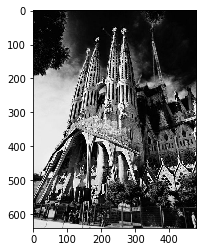

In [10]:
# load and display an image with Matplotlib
from PIL import Image
from matplotlib import image
from matplotlib import pyplot

image = image.imread('img/sagrada_familia.jpg')
#image = image[:, :, 0]
print(image.dtype)
print(image.shape)

pyplot.imshow(image, cmap='Greys')
pyplot.show()

In [15]:
image[:,:,2][5]

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  2,  0,  8,
       27, 27, 10,  0,  0, 10,  3,  0,  4, 18, 24, 29, 43, 18,  0,  3, 17,
       11,  0,  0, 18, 21,  1, 10, 23, 13, 28, 34, 62, 46, 27, 19, 22, 26,
       25, 21, 26, 25, 22, 19, 17, 16, 16, 16, 13, 13, 14, 15, 15, 14, 12,
       11, 12, 12, 12, 11, 10, 10, 12, 14, 12, 12, 12, 12, 11, 11, 11, 11,
       11, 11, 10,  9,  8,  8,  8,  9,  8,  8,  8,  8,  8,  8,  8,  8,  7,
        7,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  5,  5,  5,
        5,  4,  4,  4,  4

If I send this chiphertext twice, it may be dangerous. What if in all comunications I start by "Dear..." and the attacker knows it?. A better mode is the Cipher block chaining (CBC)

In [12]:
block_size_bits = 128

for message_len in range(128):
    m = str.encode("a"*message_len)
    
    padder = padding.PKCS7(block_size_bits).padder()
    m_padded = padder.update(m) + padder.finalize()
    encryptor = cipher.encryptor()
    
    ctx = encryptor.update(m_padded) + encryptor.finalize()
    print(len(m_padded))

16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


## Fernet

In [13]:
from cryptography.fernet import Fernet

# secret key generation
secret_key = Fernet.generate_key()
box = Fernet(secret_key)

max_len = 100
for n in range(1, max_len):
    # generate messages of n a's
    message = "".join(["a" for _ in range(n)])
    message = str.encode(message)
    
    ciphertext = box.encrypt(message)
    print(f"len_message: {len(message)}, len_ciphertext: {len(ciphertext)}")


len_message: 1, len_ciphertext: 100
len_message: 2, len_ciphertext: 100
len_message: 3, len_ciphertext: 100
len_message: 4, len_ciphertext: 100
len_message: 5, len_ciphertext: 100
len_message: 6, len_ciphertext: 100
len_message: 7, len_ciphertext: 100
len_message: 8, len_ciphertext: 100
len_message: 9, len_ciphertext: 100
len_message: 10, len_ciphertext: 100
len_message: 11, len_ciphertext: 100
len_message: 12, len_ciphertext: 100
len_message: 13, len_ciphertext: 100
len_message: 14, len_ciphertext: 100
len_message: 15, len_ciphertext: 100
len_message: 16, len_ciphertext: 120
len_message: 17, len_ciphertext: 120
len_message: 18, len_ciphertext: 120
len_message: 19, len_ciphertext: 120
len_message: 20, len_ciphertext: 120
len_message: 21, len_ciphertext: 120
len_message: 22, len_ciphertext: 120
len_message: 23, len_ciphertext: 120
len_message: 24, len_ciphertext: 120
len_message: 25, len_ciphertext: 120
len_message: 26, len_ciphertext: 120
len_message: 27, len_ciphertext: 120
len_messag